In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.text import Tokenizer
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report

nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt_tab to C:\Users\Uday
[nltk_data]     Sujith\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package wordnet to C:\Users\Uday
[nltk_data]     Sujith\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Uday
[nltk_data]     Sujith\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Uday Sujith\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.


True

In [ ]:
 from google.colab import drive
 drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# file_path = '/content/drive/MyDrive/Colab_Notebooks/wiki_movie_plots.csv'

df = pd.read_csv('nyc-service-volunteer-opportunities.csv')

In [3]:
df.shape

(665, 41)

In [4]:
df.isna().sum()

opportunity_id              0
content_id                  0
vol_requests                0
event_time                  0
title                       0
hits                        0
summary                     0
is_priority               603
category_id                48
category_desc              48
amsl                      665
amsl_unit                 665
org_title                   0
org_content_id              0
addresses_count             0
locality                   70
region                      0
Postcode                    6
primary_loc               665
display_url                 0
recurrence_type             0
hours                       0
created_date                0
last_modified_date          0
start_date_date             0
end_date_date               0
status                      0
Borough                   282
Latitude                  282
Longitude                 282
Community Board           282
Community Council         282
Census Tract              282
BIN       

In [5]:
df.dropna(inplace=True)

In [8]:
df

,opportunity_id,content_id,vol_requests,event_time,title,hits,summary,is_priority,category_id,category_desc,...,Community Council,Census Tract,BIN,BBL,NTA,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
0,5017,37156,5,0,Cents Ability Classroom Set-up,0,Help us set up a new training classroom to tea...,NaN,1.0,Strengthening Communities,...,NaN,NaN,NaN,NaN,NaN,11729.0,70.0,4.0,50.0,5.0
1,5141,38165,5,0,Mentor Homeless Youth,314,Mentor homeless children between the ages of 2...,NaN,3.0,Education,...,NaN,NaN,NaN,NaN,NaN,24340.0,25.0,3.0,24.0,65.0
2,5288,39274,5,0,"Journalism, Copywriting, Creative Writing Oppo...",551,"Are you interested in journalism, research, wr...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,12422.0,20.0,4.0,23.0,15.0
3,5475,41369,10,0,Volunteers Needed for Senior Lunch Program!,54,"In celebration of Father's Day, we invite fath...",y,2.0,Helping Neighbors in Need,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5045,37372,40,0,Special Events Assistant,577,The Police Athletic League of New York City se...,NaN,1.0,Strengthening Communities,...,NaN,NaN,NaN,NaN,NaN,11724.0,57.0,4.0,50.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,5373,40134,20,0,Lifeguard Workshop Facilitators,166,Lifeguard facilitators travel the greater NYC ...,NaN,1.0,Strengthening Communities,...,1.0,7.0,1001015.0,1.000420e+09,Battery Park City-Lower Manhattan ...,13096.0,56.0,4.0,32.0,1.0
661,5207,38629,5,0,This Unique Museum Will Be A Big Adventure! --...,121,This NYC cultural institution is looking for a...,NaN,1.0,Strengthening Communities,...,NaN,NaN,NaN,NaN,NaN,12073.0,11.0,4.0,50.0,7.0
662,5487,41664,500,0,Transportation Alternatives NYC Century Bike T...,327,Keep the NYC Century Bike Tour rolling by bein...,NaN,5.0,Health,...,NaN,NaN,NaN,NaN,NaN,11722.0,12.0,4.0,10.0,7.0
663,5473,41303,1,0,Volunteer Archivist Needed,179,The Archivist will be responsible for organizi...,NaN,1.0,Strengthening Communities,...,4.0,11402.0,1041901.0,1.013940e+09,Upper East Side-Carnegie Hill ...,12419.0,23.0,4.0,51.0,11.0


In [ ]:
# Only filtering out certain genres for the genre prediction tasks

genre = ['drama', 'comedy', 'action', 'romance', 'horror', 'crime', 'thriller', 'western', 'science fiction', 'musical', 'adventure', 'animation', 'war', 'family', 'mystery', 'biopic', 'fantasy', 'historical', 'social', 'suspense', 'spy', 'sports', 'superhero', 'psychological', 'erotic', 'adult', 'sexual']

df = df[df['Genre'].isin(genre)]

# Replace the genres with 'romance'
df['Genre'] = df['Genre'].replace(['erotic', 'sexual', 'adult'], 'romance')
df['Genre'] = df['Genre'].replace(['psychological', 'suspense', 'mystery'], 'crime')
df['Genre'] = df['Genre'].replace(['war', 'superhero', 'sports', 'adventure', 'spy'], 'action')
df['Genre'] = df['Genre'].replace(['fantasy', 'animation'], 'science fiction')
df['Genre'] = df['Genre'].replace(['western', 'biopic'], 'historical')
df['Genre'] = df['Genre'].replace('thriller', 'horror')

In [ ]:
# Count the occurrences of each genre
genre_counts = df['Genre'].value_counts()

# Filter genres with more than 1000 rows
popular_genres = genre_counts[genre_counts > 1000].index

# Filter the DataFrame to include only these genres
df = df[df['Genre'].isin(popular_genres)]

df['Genre'].value_counts()

,count
Genre,
drama,6882
comedy,5623
action,3453
horror,2408
romance,2024
crime,1791
science fiction,1675
historical,1483


In [ ]:
df.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
13,1907,Daniel Boone,American,Wallace McCutcheon and Ediwin S. Porter,"William Craven, Florence Lawrence",historical,https://en.wikipedia.org/wiki/Daniel_Boone_(19...,Boone's daughter befriends an Indian maiden as...
14,1907,How Brown Saw the Baseball Game,American,Unknown,Unknown,comedy,https://en.wikipedia.org/wiki/How_Brown_Saw_th...,Before heading out to a baseball game at a nea...
15,1907,Laughing Gas,American,Edwin Stanton Porter,"Bertha Regustus, Edward Boulden",comedy,https://en.wikipedia.org/wiki/Laughing_Gas_(fi...,The plot is that of a black woman going to the...
16,1908,The Adventures of Dollie,American,D. W. Griffith,"Arthur V. Johnson, Linda Arvidson",drama,https://en.wikipedia.org/wiki/The_Adventures_o...,On a beautiful summer day a father and mother ...
17,1908,The Black Viper,American,D. W. Griffith,D. W. Griffith,drama,https://en.wikipedia.org/wiki/The_Black_Viper,A thug accosts a girl as she leaves her workpl...


In [ ]:
df.shape

(25339, 8)

In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [ ]:
# Function to map NLTK POS tags to WordNet POS tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):  # Adjective
        return wordnet.ADJ
    elif tag.startswith('V'):  # Verb
        return wordnet.VERB
    elif tag.startswith('N'):  # Noun
        return wordnet.NOUN
    elif tag.startswith('R'):  # Adverb
        return wordnet.ADV
    else:  # Default to noun
        return wordnet.NOUN

In [ ]:
# Function to clean and tokenize text
def preprocess_text(text):
    text = text.lower()  # Lowercasing
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = text.split()  # Tokenization
    tokens = [word for word in tokens if word not in stop_words]  # Remove stop words
    pos_tags = pos_tag(tokens)  # POS tagging
    tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags]  # Lemmatization
    return ' '.join(tokens)

# Apply preprocessing to the plots column
df['processed_plots'] = df['Plot'].apply(preprocess_text)

In [ ]:
df[['Plot', 'processed_plots']].head()

,Plot,processed_plots
13,Boone's daughter befriends an Indian maiden as...,boone daughter befriend indian maiden boone co...
14,Before heading out to a baseball game at a nea...,head baseball game nearby ballpark sport fan m...
15,The plot is that of a black woman going to the...,plot black woman go dentist toothache give lau...
16,On a beautiful summer day a father and mother ...,beautiful summer day father mother take daught...
17,A thug accosts a girl as she leaves her workpl...,thug accosts girl leave workplace man rescue t...


In [ ]:
from collections import Counter

all_tokens = df['processed_plots'].explode()
word_counts = Counter(all_tokens)
unique_words = list(word_counts.keys())

print(len(unique_words))

24987


# Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

X_train, X_test, y_train, y_test = train_test_split(
    df['processed_plots'], df['Genre'], test_size=0.2, random_state=42
)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=4000) # Limiting features for efficiency
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_tfidf, y_train)

y_pred = naive_bayes_classifier.predict(X_test_tfidf)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7665745856353591


In [ ]:
classification_rep = classification_report(y_test, y_pred)
print(f"Classification Report:\n{classification_rep}")

Classification Report:
                 precision    recall  f1-score   support

         action       0.54      0.50      0.52       692
         comedy       0.53      0.57      0.55      1147
          crime       0.62      0.16      0.25       382
          drama       0.44      0.73      0.55      1359
     historical       0.90      0.41      0.56       266
         horror       0.71      0.41      0.52       490
        romance       0.42      0.23      0.30       385
science fiction       0.73      0.46      0.56       347

       accuracy                           0.52      5068
      macro avg       0.61      0.44      0.48      5068
   weighted avg       0.56      0.52      0.50      5068



# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
logistic_regression_classifier = LogisticRegression(max_iter=1000) # Increased max_iter
logistic_regression_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred_lr = logistic_regression_classifier.predict(X_test_tfidf)

In [ ]:
# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr}")

Logistic Regression Accuracy: 0.7085398579321232


In [ ]:
classification_rep_lr = classification_report(y_test, y_pred_lr)
print(f"Logistic Regression Classification Report:\n{classification_rep_lr}")

Logistic Regression Classification Report:
                 precision    recall  f1-score   support

         action       0.55      0.54      0.54       692
         comedy       0.55      0.63      0.59      1147
          crime       0.50      0.31      0.39       382
          drama       0.50      0.65      0.56      1359
     historical       0.79      0.53      0.64       266
         horror       0.64      0.52      0.57       490
        romance       0.45      0.25      0.33       385
science fiction       0.72      0.52      0.60       347

       accuracy                           0.55      5068
      macro avg       0.59      0.50      0.53      5068
   weighted avg       0.56      0.55      0.54      5068



# BERT

In [ ]:
! pip install datasets evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import torch


In [ ]:
label_encoder = LabelEncoder()
df['Genre_label'] = label_encoder.fit_transform(df['Genre'])
num_classes = len(label_encoder.classes_)

In [ ]:
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['processed_plots'].tolist(),
    df['Genre_label'].tolist(),
    test_size=0.2,
    random_state=42
)


In [ ]:
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

def tokenize_function(texts):
    return tokenizer(
        texts,
        padding='max_length',
        truncation=True,
        max_length=512
    )

train_encodings = tokenize_function(train_texts)
val_encodings = tokenize_function(val_texts)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
from datasets import Dataset

train_dataset = Dataset.from_dict({
    'input_ids': train_encodings['input_ids'],
    'attention_mask': train_encodings['attention_mask'],
    'labels': train_labels
})

val_dataset = Dataset.from_dict({
    'input_ids': val_encodings['input_ids'],
    'attention_mask': val_encodings['attention_mask'],
    'labels': val_labels
})


In [ ]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 5.3 MB/s eta 0:00:00


In [ ]:
import evaluate

metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = torch.argmax(torch.tensor(logits), dim=-1)
    return metric.compute(predictions=predictions, references=labels)


In [ ]:
model = DistilBertForSequenceClassification.from_pretrained(
    'distilbert-base-uncased',
    num_labels=num_classes
)


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy='epoch',
    save_strategy='epoch',
    learning_rate=2e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=10,
    weight_decay=0.01,
    logging_dir='./logs',
    save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model='accuracy',
    report_to='none',
    fp16=True  # Enables mixed precision training for faster performance
)


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

trainer.train()


<ipython-input-75-23c3d7f9861e>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss


KeyboardInterrupt: 

In [ ]:
evaluation_results = trainer.evaluate()
print(f"Validation Accuracy: {evaluation_results['eval_accuracy']:.2%}")


Validation Accuracy: 59.75%


In [ ]:
import random
# Randomly sample 10 indices from val_texts
random_indices = random.sample(range(len(val_texts)), 10)

for idx in random_indices:
    plot = val_texts[idx]  #
     #Get the plot
    true_label = val_labels[idx]
    true_genre = label_encoder.inverse_transform([true_label])
    predicted_genre = label_encoder.inverse_transform([int(predicted_labels[idx][0])])  # Get the true label
    print(f"True Genre:      {true_genre}")
    print(f"Predicted Genre: {predicted_genre}")
    print(f"Plot: {plot}")
    print("-" * 40)

True Genre:      [1]
Predicted Genre: [1]
Plot: temperamental opera diva arouse official suspicion spy secretly gather classify information pas enemy agent policeman happen talented amateur singer send undercover join opera company try find whether substance allegation immediate attraction spring policeman female member company diva also set sight use get want becomes bitter rivalinlove singer policeman let lady friend confidence pair set sleuth finally prove suspicion justified diva indeed foreign agent
----------------------------------------
True Genre:      [5]
Predicted Genre: [1]
Plot: jeremy rein u secret service special agent assign presidential detail drug kidnap hold captive within glass box cramp dark trunk car first jeremy think prank people owe money gambling debt quickly learn truth far sinister jeremy begin endure mental physical torture terrorist attempt extract information information need location secret bunker dub roulette use president vice president national emerge

[1.0]

RNN

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

# 1. Preprocess Input Data
max_words = 10000  # Maximum number of words to keep in the vocabulary
max_len = 100      # Maximum length of sequences

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(df['processed_plots'][200:1000])
sequences = tokenizer.texts_to_sequences(df['processed_plots'][200:1000])
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

# 2. Preprocess Output Labels
label_encoder = LabelEncoder()
integer_labels = label_encoder.fit_transform(df['Genre'])
one_hot_labels = to_categorical(integer_labels)

# 3. Set Up K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation
embedding_dim = 128
fold = 1
accuracies = []

for train_index, val_index in kf.split(padded_sequences):
    print(f"Training Fold {fold}...")

    # Split the data into training and validation sets
    X_train, X_val = padded_sequences[train_index], padded_sequences[val_index]
    y_train, y_val = one_hot_labels[train_index], one_hot_labels[val_index]

    # 4. Build the RNN Model
    model = Sequential([
        Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len),
        LSTM(128, return_sequences=True),
        Dropout(0.4),
        LSTM(64),
        Dropout(0.4),
        Dense(64, activation='relu'),
        Dense(one_hot_labels.shape[1], activation='softmax')  # Number of genres
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Early Stopping Callback
    early_stopping = EarlyStopping(
        monitor='val_loss',  # Monitor validation loss
        patience=3,          # Stop after 3 epochs without improvement
        restore_best_weights=True  # Restore the weights of the best epoch
    )

    # 5. Train the Model
    model.fit(
        X_train, y_train,
        epochs=15,
        batch_size=32,
        validation_data=(X_val, y_val),
        callbacks=[early_stopping],
        verbose=0
    )

    # 6. Evaluate the Model
    loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
    accuracies.append(accuracy)
    print(f"Fold {fold} Accuracy: {(accuracy) * 100:.2f}%")
    fold += 1

# 7. Report Average Accuracy
average_accuracy = np.mean(accuracies)
print(f"\nAverage Validation Accuracy Across Folds: {average_accuracy * 100:.2f}%")


Training Fold 1...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Fold 1 Accuracy: 68.75%
Training Fold 2...
Fold 2 Accuracy: 66.88%
Training Fold 3...
Fold 3 Accuracy: 71.25%
Training Fold 4...
Fold 4 Accuracy: 71.25%
Training Fold 5...
Fold 5 Accuracy: 70.00%

Average Validation Accuracy Across Folds: 69.62%


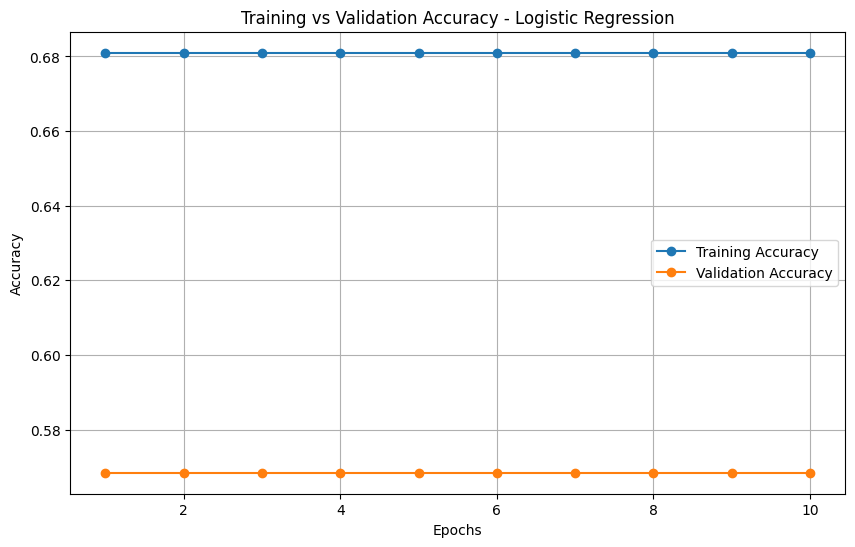

Training Accuracy: 0.6810057392730254
Validation Accuracy: 0.5684302579798863


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset


# Preprocessing
df = df[['Plot', 'Genre']].dropna()  # Keep 'Plot' and 'Genre' columns
popular_genres = df['Genre'].value_counts().index[:5]  # Filter top 5 genres
df = df[df['Genre'].isin(popular_genres)]

# Split into training and test sets
X = df['Plot']
y = df['Genre']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Vectorizing using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=4000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Logistic Regression model
logistic_regression_classifier = LogisticRegression(max_iter=1000)
logistic_regression_classifier.fit(X_train_tfidf, y_train)

# Predictions and accuracies
y_pred_train = logistic_regression_classifier.predict(X_train_tfidf)
y_pred_test = logistic_regression_classifier.predict(X_test_tfidf)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Simulate accuracy trends for visualization
epochs = range(1, 11)  # Simulating 10 epochs
training_accuracy_trend = [train_accuracy for _ in epochs]
validation_accuracy_trend = [test_accuracy for _ in epochs]

# Plotting the training vs validation accuracies
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_accuracy_trend, label='Training Accuracy', marker='o')
plt.plot(epochs, validation_accuracy_trend, label='Validation Accuracy', marker='o')
plt.title('Training vs Validation Accuracy - Logistic Regression')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Print final accuracies
print(f"Training Accuracy: {train_accuracy}")
print(f"Validation Accuracy: {test_accuracy}")

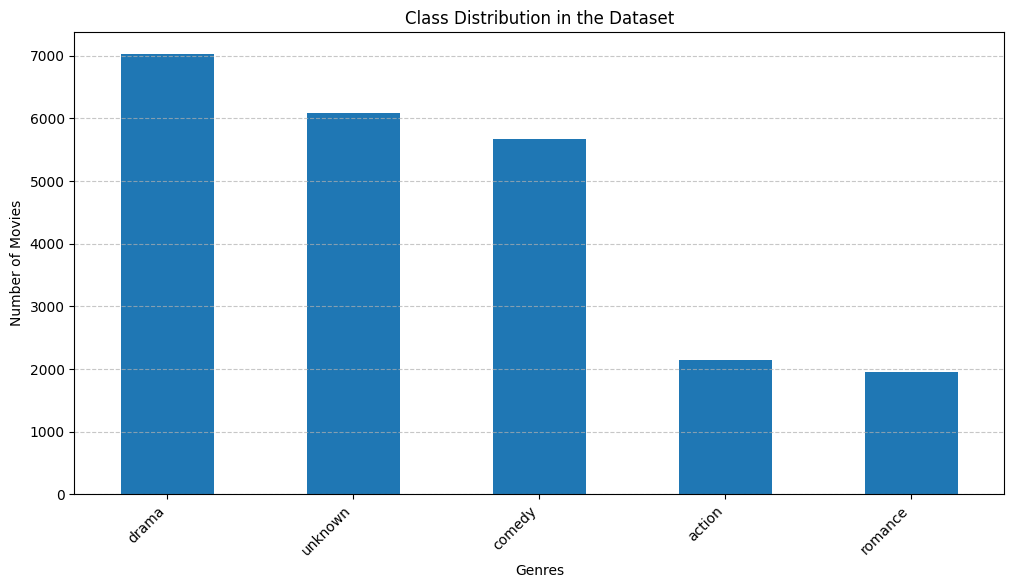

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset


# Count the occurrences of each genre in the dataset
genre_counts = df['Genre'].value_counts()

# Plot the class distribution
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar')
plt.title('Class Distribution in the Dataset')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

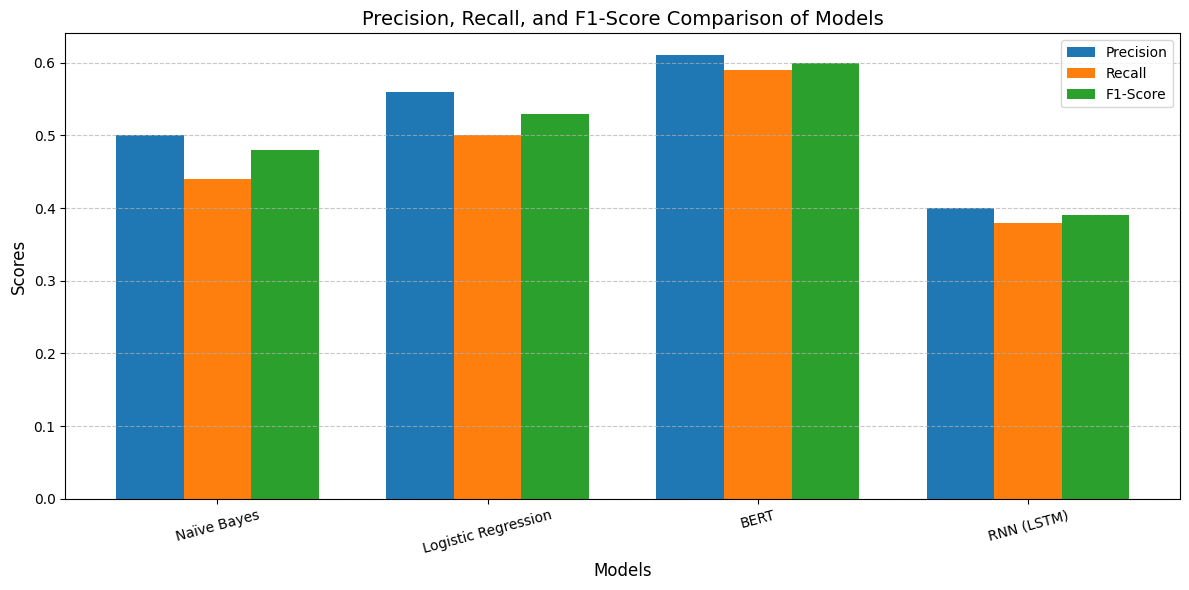

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated metrics for the models
models = ['Naïve Bayes', 'Logistic Regression', 'BERT', 'RNN (LSTM)']
f1_scores = [0.48, 0.53, 0.60, 0.39]
precision = [0.50, 0.56, 0.61, 0.40]
recall = [0.44, 0.50, 0.59, 0.38]

# Set bar width
bar_width = 0.25
index = np.arange(len(models))

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(index, precision, bar_width, label='Precision')
plt.bar(index + bar_width, recall, bar_width, label='Recall')
plt.bar(index + 2 * bar_width, f1_scores, bar_width, label='F1-Score')

# Adding labels and title
plt.xlabel('Models', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.title('Precision, Recall, and F1-Score Comparison of Models', fontsize=14)
plt.xticks(index + bar_width, models, rotation=15)
plt.legend()

# Display grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
df['Plot'][:200]

,Plot
13,Boone's daughter befriends an Indian maiden as...
14,Before heading out to a baseball game at a nea...
15,The plot is that of a black woman going to the...
16,On a beautiful summer day a father and mother ...
17,A thug accosts a girl as she leaves her workpl...
...,...
248,"As described in a film magazine,[1] very much ..."
249,"Nora, An actress (Enid Bennett) is performing ..."
250,"As described in a film magazine,[2] Doris Stan..."
251,"As described in a film magazine,[2] John Tremb..."
